In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# For display
from IPython.display import display


In [62]:

df = pd.read_csv("data/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]


In [65]:
def predict_heart_attack(model, scaler, user_input):
    input_df = pd.DataFrame([user_input])
    input_df = input_df[X.columns]  
    input_scaled = scaler.transform(input_df)

    prediction = model.predict(input_scaled)[0]
    proba = model.predict_proba(input_scaled)[0]
    return prediction, proba


In [66]:
user_input = {
    'age': 48,
    'sex': 1,
    'cp': 2,
    'trestbps': 150,
    'chol': 240,
    'fbs': 0,
    'restecg': 1,
    'thalach': 160,
    'exang': 0,
    'oldpeak': 1.5,
    'slope': 2,
    'ca': 0,
    'thal': 2
}


In [67]:
prediction, proba = predict_heart_attack(model, scaler, user_input)

risk_label = "At Risk" if prediction == 1 else "No Risk"
confidence = proba[prediction] * 100
print(f"Prediction: {risk_label} ({confidence:.2f}%)")

# Show full probabilities
print(f"Class Probabilities → No Risk: {proba[0]*100:.2f}%, At Risk: {proba[1]*100:.2f}%")


Prediction: At Risk (86.55%)
Class Probabilities → No Risk: 13.45%, At Risk: 86.55%


/tmp/ipykernel_52877/269133741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="coolwarm")


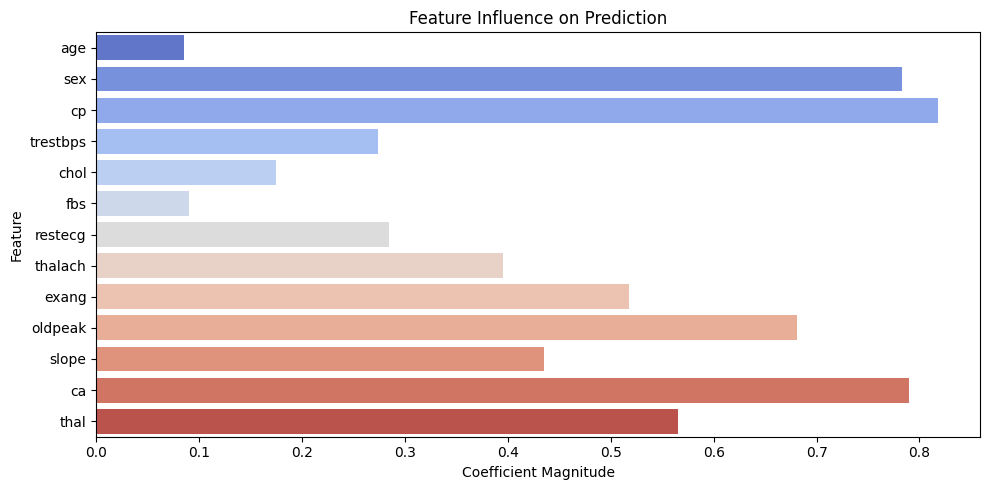

In [68]:
importance = abs(model.coef_[0])
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=features, palette="coolwarm")
plt.title("Feature Influence on Prediction")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Train pipeline
pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [70]:
import joblib
joblib.dump(pipeline, "pipeline.joblib")


['pipeline.joblib']

In [73]:
model = joblib.load('app/model/pipeline.joblib')

In [77]:
import pandas as pd

# The exact feature order used during training
feature_order = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 
    'cp', 'fbs', 'exang', 'sex', 'restecg', 
    'slope', 'ca', 'thal'
]

# Two sample inputs
inputs = [
    {
        'age': 54, 'trestbps': 140, 'chol': 239, 'thalach': 160, 'oldpeak': 1.2,
        'cp': 1, 'fbs': 0, 'exang': 0, 'sex': 1, 'restecg': 1, 'slope': 2, 'ca': 0, 'thal': 2
    },
    {
        'age': 63, 'trestbps': 145, 'chol': 233, 'thalach': 150, 'oldpeak': 3.0,
        'cp': 3, 'fbs': 1, 'exang': 1, 'sex': 1, 'restecg': 0, 'slope': 0, 'ca': 2, 'thal': 7
    }
]

# Predict using the loaded pipeline (model)
for i, inp in enumerate(inputs):
    # Create DataFrame and reorder columns to match training
    df_input = pd.DataFrame([inp])[feature_order]
    
    # Get probabilities
    proba = model.predict_proba(df_input)
    
    print(f"Input {i+1}:")
    print(f"  ➤ Probability of No Risk (0): {proba[0][0]*100:.2f}%")
    print(f"  ➤ Probability of Risk (1):    {proba[0][1]*100:.2f}%")
    print(f"  ➤ Predicted Class: {model.predict(df_input)[0]}")
    print("------------------------------------------------")


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
